In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve





#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
import ydata_profiling

# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier #pip install xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier#pip install mlxtend


C:\Users\Avantika\AppData\Local\Temp\ipykernel_21836\3072532622.py:26: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
dataset_HAP = pd.read_csv("C:\\Users\\Avantika\\OneDrive\\Documents\\HAP\\heart_attack.csv")

In [3]:
dataset_HAP.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
dataset_HAP.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [5]:
dataset_HAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataset_HAP.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

imputer.fit(dataset_HAP)

dataset_HAP = pd.DataFrame(imputer.transform(dataset_HAP), columns = dataset_HAP.columns)
dataset_HAP.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1  53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2  70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3  61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4  62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   

   slope   ca  thal  target  
0    2.0  2.0   3.0     0.0  
1    0.0  0.0   3.0     0.0  
2    0.0  0.0   3.0     0.0  
3    2.0  1.0   3.0     0.0  
4    1.0  3.0   2.0     0.0

In [8]:
import pandas_profiling as pp

pp.ProfileReport(dataset_HAP)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import ydata_profiling
pp.ProfileReport(dataset_HAP)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
y = dataset_HAP["target"]
X = dataset_HAP.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [11]:
from collections import Counter


In [12]:
print(y_test.unique())
Counter(y_train)

[1. 0.]


Counter({1.0: 419, 0.0: 401})

In [13]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.model_selection import train_test_split
print(len(X_train), 'train examples')
print(len(X_test), 'test examples')

820 train examples
205 test examples


In [16]:
# ml models to be use Logistic Regression
#Naive Bayes
#Random Forest Classifier
#Extreme Gradient Boost
#K-Nearest Neighbour
#Decision Tree
#Support Vector Machine


# Train three different models: Random Forest, SVM, and Logistic Regression
models = {'Random Forest': RandomForestClassifier(), 'SVM': SVC(), 'Logistic Regression': LogisticRegression()}

# Ask the user to choose a model
model_name = input("Choose a model (Random Forest, SVM, Logistic Regression): ")
if model_name not in models:
    raise ValueError("Invalid model name")
model = models[model_name]

# Train the selected model
model.fit(X_train, y_train)


# Evaluate the selected model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} accuracy: {accuracy:.2f}")

Choose a model (Random Forest, SVM, Logistic Regression): SVM
SVM accuracy: 0.97


In [17]:




# Get user input for a new patient
age = int(input("Enter the age of the patient: "))
sex = int(input("Enter the sex of the patient (0 for female, 1 for male): "))
cp = int(input("Enter the chest pain type experienced by the patient (1-4)(1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic): "))
trestbps = int(input("Enter the resting blood pressure of the patient (mm Hg): "))
chol = int(input("Enter the cholesterol level of the patient (mg/dl): "))
fbs = int(input("Enter the fasting blood sugar level of the patient (0 for <= 120 mg/dl, 1 for > 120 mg/dl): "))
restecg = int(input("Enter the resting electrocardiographic results of the patient (0-2)(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria): "))
thalach = int(input("Enter the maximum heart rate achieved by the patient during exercise: "))
exang = int(input("Enter whether the patient experiences exercise-induced angina (0 for no, 1 for yes): "))
oldpeak = float(input("Enter the ST depression induced by exercise relative to rest: "))
slope = int(input("Enter the slope of the peak exercise ST segment of the patient (1-3)(1 = upsloping, 2 = flat, 3 = downsloping): "))
ca = int(input("Enter the number of major vessels colored by fluoroscopy (0-3): "))
thal = int(input("Enter the thallium stress test result of the patient (1-3)(1 = normal, 2 = fixed defect, 3 = reversable defect): "))
# Use the selected model to make predictions on new data
new_data = np.array([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
prediction = model.predict(new_data)
print(f"Prediction for new data: {prediction}")

Enter the age of the patient: 67
Enter the sex of the patient (0 for female, 1 for male): 1
Enter the chest pain type experienced by the patient (1-4)(1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic): 1
Enter the resting blood pressure of the patient (mm Hg): 1
Enter the cholesterol level of the patient (mg/dl): 1
Enter the fasting blood sugar level of the patient (0 for <= 120 mg/dl, 1 for > 120 mg/dl): 1
Enter the resting electrocardiographic results of the patient (0-2)(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria): 1
Enter the maximum heart rate achieved by the patient during exercise: 1
Enter whether the patient experiences exercise-induced angina (0 for no, 1 for yes): 1
Enter the ST depression induced by exercise relative to rest: 1
Enter the slope of the peak exercise ST segment of the patient (1-3)(1 = upsloping, 2 = flat, 3 = downsloping): 1
Enter the number of ma

In [27]:
# Get user input for a new patient


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


# Get user input for a new patient
age = int(input("Enter the age of the patient: "))
sex = int(input("Enter the sex of the patient (0 for female, 1 for male): "))
cp = int(input("Enter the chest pain type experienced by the patient (1-4)(1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic): "))
trestbps = int(input("Enter the resting blood pressure of the patient (mm Hg): "))
chol = int(input("Enter the cholesterol level of the patient (mg/dl): "))
fbs = int(input("Enter the fasting blood sugar level of the patient (0 for <= 120 mg/dl, 1 for > 120 mg/dl): "))
restecg = int(input("Enter the resting electrocardiographic results of the patient (0-2)(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria): "))
thalach = int(input("Enter the maximum heart rate achieved by the patient during exercise: "))
exang = int(input("Enter whether the patient experiences exercise-induced angina (0 for no, 1 for yes): "))
oldpeak = float(input("Enter the ST depression induced by exercise relative to rest: "))
slope = int(input("Enter the slope of the peak exercise ST segment of the patient (1-3)(1 = upsloping, 2 = flat, 3 = downsloping): "))
ca = int(input("Enter the number of major vessels colored by fluoroscopy (0-3): "))
thal = int(input("Enter the thallium stress test result of the patient (1-3)(1 = normal, 2 = fixed defect, 3 = reversable defect): "))


# Create a dataframe from the user input
new_patient = pd.DataFrame({
    "age": [age],
    "sex": [sex],
    "cp": [cp],
    "trestbps": [trestbps],
    "chol": [chol],
    "fbs": [fbs],
    "restecg": [restecg],
    "thalach": [thalach],
    "exang": [exang],
    "oldpeak": [oldpeak],
    "slope": [slope],
    "ca": [ca],
    "thal": [thal]
})



# Train three different models: Random Forest, SVM, and Logistic Regression
models = {'Random Forest': RandomForestClassifier(), 'SVM': SVC(), 'Logistic Regression': LogisticRegression(),'Naive Bayes':GaussianNB(), 'Egb':XGBClassifier(),'Knn':KNeighborsClassifier(),'DecisionTreeClassifier':DecisionTreeClassifier()}

# Ask the user to choose a model
model_name = input("Choose a model (Random Forest, SVM, Logistic Regression,Naive Bayes,Extreme Gradient Boost(Egb),K-NeighbourClassifier(Knn),DecisionTreeClassifier): ")
if model_name not in models:
    raise ValueError("Invalid model name")
model = models[model_name]

# Train the selected model
model.fit(X_train, y_train)


pred = model.predict(new_patient)

# Calculate the accuracy, F1 score, sensitivity, specificity, and precision of the model's predictions
acc = accuracy_score([1], pred) # Assuming the patient has experienced a heart attack (1) if the model predicts a heart attack
f1 = f1_score([1], pred)
recall = recall_score([1], pred)
precision = precision_score([1], pred)
specificity = recall_score([0], pred)


# Make predictions for the new patient using th7print("Accuracy of the model for the new patient: {:.2f}".format(acc))
print("F1 score of the model for the new patient: {:.2f}".format(f1))
print("Recall of the model for the new patient: {:.2f}".format(recall))
print("Precision of the model for new patient : {:.2f}".format(precision))
print("specificity of the model for new patient :{:.2f}".format(specificity))


# Evaluate the selected model on the test data
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"{model_name} accuracy: {accuracy:.2f}")


Enter the age of the patient: 67
Enter the sex of the patient (0 for female, 1 for male): 1
Enter the chest pain type experienced by the patient (1-4)(1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic): 1
Enter the resting blood pressure of the patient (mm Hg): 1
Enter the cholesterol level of the patient (mg/dl): 1
Enter the fasting blood sugar level of the patient (0 for <= 120 mg/dl, 1 for > 120 mg/dl): 1
Enter the resting electrocardiographic results of the patient (0-2)(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria): 1
Enter the maximum heart rate achieved by the patient during exercise: 11
Enter whether the patient experiences exercise-induced angina (0 for no, 1 for yes): 1
Enter the ST depression induced by exercise relative to rest: 1
Enter the slope of the peak exercise ST segment of the patient (1-3)(1 = upsloping, 2 = flat, 3 = downsloping): 1
Enter the number of m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, 

In [28]:
# model dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        98
         1.0       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [29]:
#new user
m1nu = 'Logistic Regression'
lrnu = LogisticRegression()
lrnu.fit(X_train, y_train)
lrnupred = lrnu.predict(new_patient)
lrnu_pred = lrnu.predict(X_test)
lrnu_conf_matrix_nu=confusion_matrix(y_test, lrnu_pred)
lrnu_acc_score_nu = accuracy_score(y_test, lrnu_pred)
print("confussion matrix")
print(lrnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",lrnu_acc_score_nu*100,'\n')

print(classification_report(y_test, lrnu_pred))


confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Support Vector Classifier: 86.34146341463415 

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        98
         1.0       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


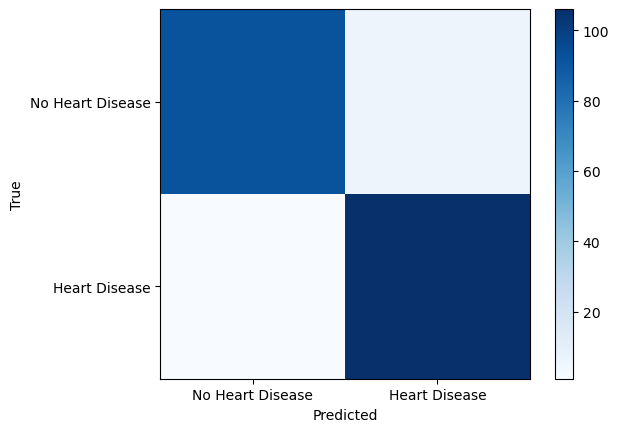

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_yticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.colorbar(im)
plt.show()


In [31]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        98
         1.0       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [32]:
#new user
m2nu = 'Naive Bayes'
nbnu = GaussianNB()
nbnu.fit(X_train, y_train)
nbnupred = nbnu.predict(new_patient)
nbnu_pred = nbnu.predict(X_test)
nbnu_conf_matrix_nu=confusion_matrix(y_test, nbnu_pred)
nbnu_acc_score_nu = accuracy_score(y_test, nbnu_pred)
print("confussion matrix")
print(nbnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",nbnu_acc_score_nu*100,'\n')

print(classification_report(y_test, nbnu_pred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Support Vector Classifier: 85.36585365853658 

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        98
         1.0       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [33]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        98
         1.0       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



In [34]:
#new user
m3nu = 'Random Forest Classfier'
rfnu = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rfnu.fit(X_train, y_train)
rfnupred = rfnu.predict(new_patient)
rfnu_pred = rfnu.predict(X_test)
rfnu_conf_matrix_nu=confusion_matrix(y_test, rfnu_pred)
rfnu_acc_score_nu = accuracy_score(y_test, rfnu_pred)
print("confussion matrix")
print(rfnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",rfnu_acc_score_nu*100,'\n')

print(classification_report(y_test, rfnu_pred))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Support Vector Classifier: 93.65853658536587 

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        98
         1.0       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [35]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Extreme Gradient Boost: 94.6341463414634 

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        98
         1.0       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [36]:
#new user
m4nu = 'Extreme Gradient Boost'
xgbnu = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgbnu.fit(X_train, y_train)
xgbnupred = xgbnu.predict(new_patient)
xgbnu_pred = xgbnu.predict(X_test)
xgbnu_conf_matrix_nu=confusion_matrix(y_test, xgbnu_pred)
xgbnu_acc_score_nu = accuracy_score(y_test, xgbnu_pred)
print("confussion matrix")
print(xgbnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",xgbnu_acc_score_nu*100,'\n')

print(classification_report(y_test, xgbnu_pred))

confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Support Vector Classifier: 94.6341463414634 

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        98
         1.0       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [37]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        98
         1.0       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
#new user
m5nu = 'K-NeighborsClassifier'
knnnu = KNeighborsClassifier(n_neighbors=10)
knnnu.fit(X_train, y_train)
knnnupred = knnnu.predict(new_patient)
knnnu_pred = knnnu.predict(X_test)
knnnu_conf_matrix_nu=confusion_matrix(y_test, knnnu_pred)
knnnu_acc_score_nu = accuracy_score(y_test, knnnu_pred)
print("confussion matrix")
print(knnnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",knnnu_acc_score_nu*100,'\n')

print(classification_report(y_test, knnnu_pred))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of Support Vector Classifier: 87.8048780487805 

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        98
         1.0       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: th

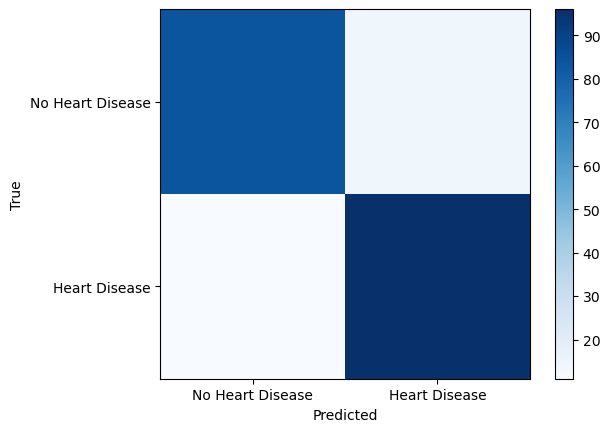

In [39]:
conf_mat = confusion_matrix(y_test, knnnu_pred)
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_yticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.colorbar(im)
plt.show()

In [40]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        98
         1.0       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [41]:
#new user
m6nu = 'DecisionTreeClassifier'
dtnu = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dtnu.fit(X_train, y_train)
dtnupred = dtnu.predict(new_patient)
dtnu_pred = dtnu.predict(X_test)
dtnu_conf_matrix_nu=confusion_matrix(y_test, dtnu_pred)
dtnu_acc_score_nu = accuracy_score(y_test, dtnu_pred)
print("confussion matrix")
print(dtnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",dtnu_acc_score_nu*100,'\n')

print(classification_report(y_test, dtnu_pred))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of Support Vector Classifier: 94.6341463414634 

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        98
         1.0       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


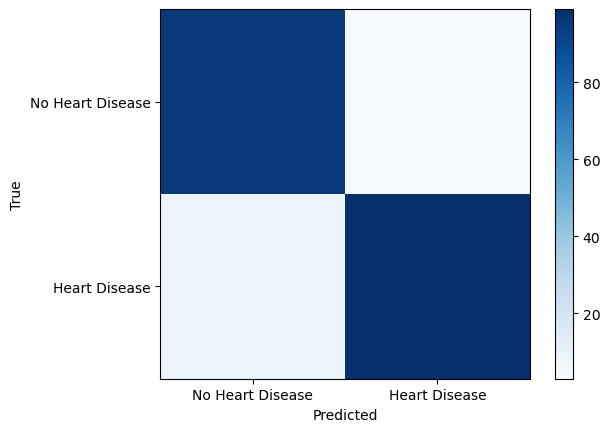

In [42]:
conf_mat = confusion_matrix(y_test, dtnu_pred)
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_yticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.colorbar(im)
plt.show()

In [43]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        98
         1.0       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [44]:
#new user
m7nu = 'Support Vector Classifier'
svcnu =  SVC(kernel='rbf', C=2)
svcnu.fit(X_train, y_train)
svcnupred = svc.predict(new_patient)
svcnu_pred = svc.predict(X_test)
svcnu_conf_matrix_nu=confusion_matrix(y_test, svcnu_pred)
svcnu_acc_score_nu = accuracy_score(y_test, svcnu_pred)
print("confussion matrix")
print(svcnu_conf_matrix_nu)
print("\n")
print("Accuracy of Support Vector Classifier:",svcnu_acc_score_nu*100,'\n')

print(classification_report(y_test, svcnu_pred))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        98
         1.0       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


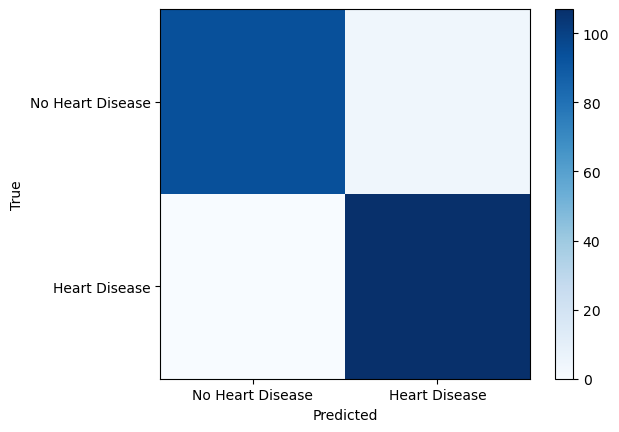

In [45]:
conf_mat = confusion_matrix(y_test, svcnu_pred)
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap=plt.cm.Blues)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_yticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.colorbar(im)
plt.show()

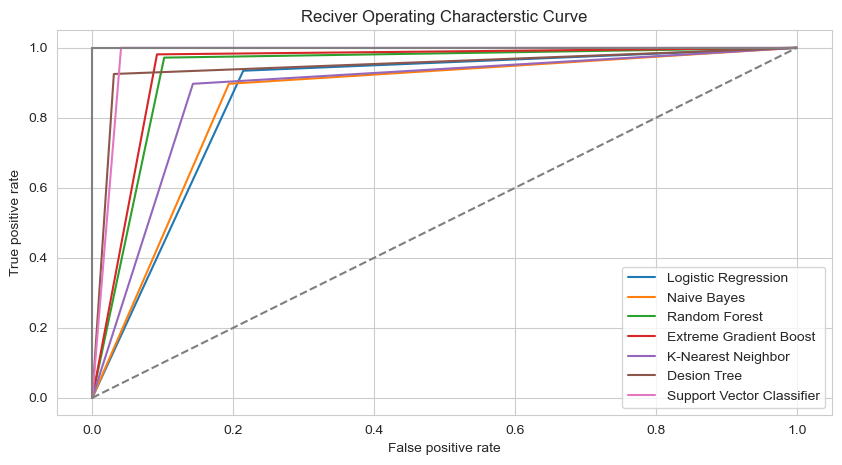

In [46]:


#new user



lrnu_false_positive_rate,lrnu_true_positive_rate,lr_threshold = roc_curve(y_test,lrnu_pred)
nbnu_false_positive_rate,nbnu_true_positive_rate,nb_threshold = roc_curve(y_test,nbnu_pred)
rfnu_false_positive_rate,rfnu_true_positive_rate,rf_threshold = roc_curve(y_test,rfnu_pred)                                                             
xgbnu_false_positive_rate,xgbnu_true_positive_rate,xgb_threshold = roc_curve(y_test,xgbnu_pred)
knnnu_false_positive_rate,knnnu_true_positive_rate,knn_threshold = roc_curve(y_test,knnnu_pred)
dtnu_false_positive_rate,dtnu_true_positive_rate,dt_threshold = roc_curve(y_test,dtnu_pred)
svcnu_false_positive_rate,svcnu_true_positive_rate,svc_threshold = roc_curve(y_test,svcnu_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lrnu_false_positive_rate,lrnu_true_positive_rate,label='Logistic Regression')
plt.plot(nbnu_false_positive_rate,nbnu_true_positive_rate,label='Naive Bayes')
plt.plot(rfnu_false_positive_rate,rfnu_true_positive_rate,label='Random Forest')
plt.plot(xgbnu_false_positive_rate,xgbnu_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knnnu_false_positive_rate,knnnu_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dtnu_false_positive_rate,dtnu_true_positive_rate,label='Desion Tree')
plt.plot(svcnu_false_positive_rate,svcnu_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [47]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  86.341463
1             Naive Bayes  85.365854
2           Random Forest  93.658537
3  Extreme Gradient Boost  94.634146
4     K-Nearest Neighbour  87.804878
5           Decision Tree  94.634146
6  Support Vector Machine  98.048780

In [48]:
model_evnu = pd.DataFrame({'Modelnu': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracynu': [lrnu_acc_score_nu*100,
                    nbnu_acc_score_nu*100,rfnu_acc_score_nu*100,xgbnu_acc_score_nu*100,knnnu_acc_score_nu*100,dtnu_acc_score_nu*100,svcnu_acc_score_nu*100]})
model_evnu

Modelnu  Accuracynu
0     Logistic Regression   86.341463
1             Naive Bayes   85.365854
2           Random Forest   93.658537
3  Extreme Gradient Boost   94.634146
4     K-Nearest Neighbour   87.804878
5           Decision Tree   94.634146
6  Support Vector Machine   98.048780

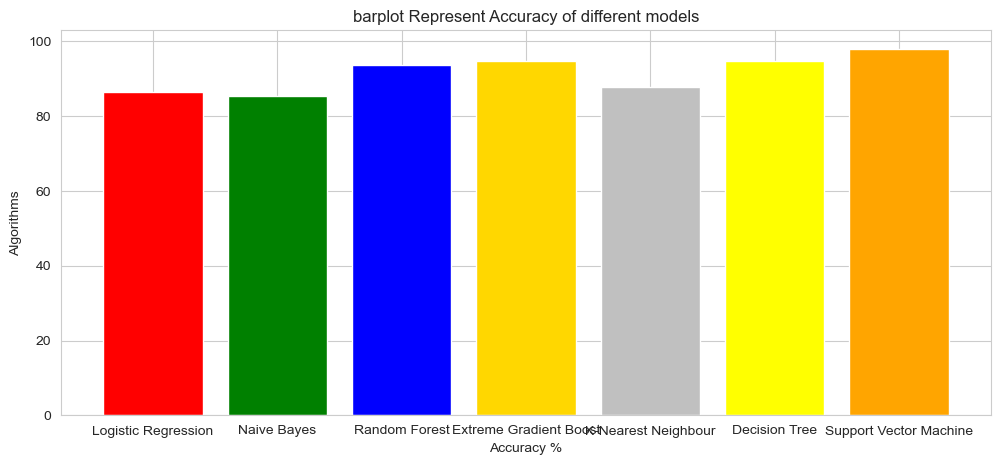

In [50]:

#neruser


colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_evnu['Modelnu'],model_evnu['Accuracynu'],color = colors)
plt.show()

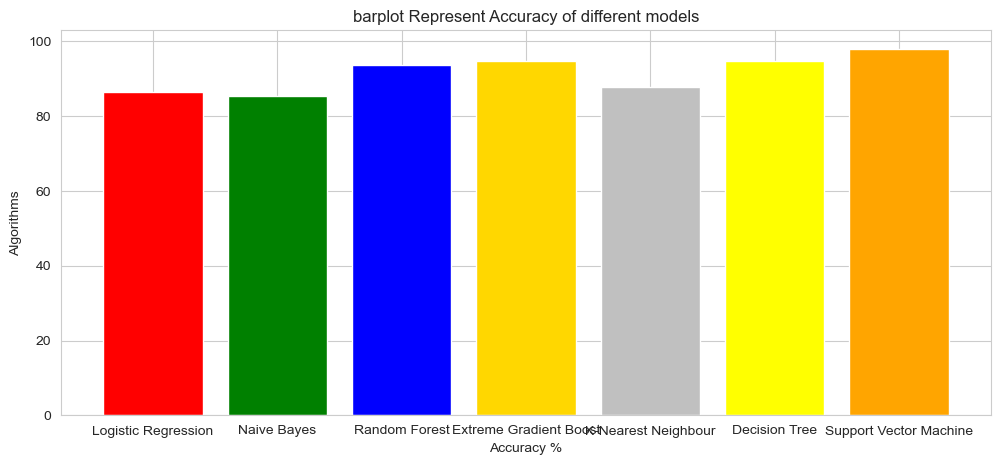

In [51]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [53]:
#In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of StackingCVClassifier: 98.04878048780488 

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        98
         1.0       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
